In [1]:
import pandas as pd


# Cargar el archivo CSV en un DataFrame
tumor_patients_recaida = pd.read_csv("recaida_gyn_norm.csv")


X = tumor_patients_recaida.drop('recaida', axis=1)
y = tumor_patients_recaida['recaida']

porcentaje_recaida_0 = (tumor_patients_recaida['recaida'] == 0).mean() * 100
porcentaje_recaida_1 = (tumor_patients_recaida['recaida'] == 1).mean() * 100

print(f"Porcentaje de recaída = 0: {porcentaje_recaida_0:.2f}%")
print(f"Porcentaje de recaída = 1: {porcentaje_recaida_1:.2f}%")

Porcentaje de recaída = 0: 12.20%
Porcentaje de recaída = 1: 87.80%


CORRELACCIÓN

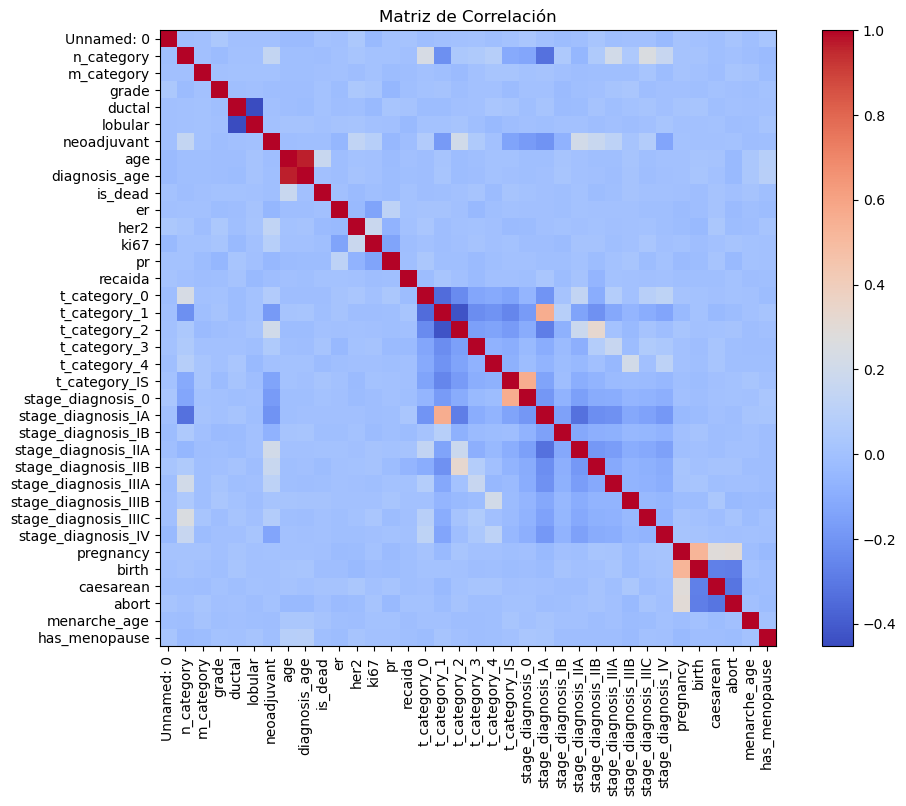

Columnas a eliminar:
{'diagnosis_age'}
Columnas eliminada


In [2]:

import matplotlib.pyplot as plt

# Cargar tu dataset
# Asumo que ya tienes las variables X e y definidas


# Calcular la matriz de correlación
matriz_correlacion = tumor_patients_recaida.corr()

# Visualizar la matriz de correlación sin Seaborn
plt.figure(figsize=(12, 8))
plt.imshow(matriz_correlacion, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns, rotation=90)
plt.yticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns)
plt.title("Matriz de Correlación")
plt.show()

# Eliminar las variables con correlación mayor al 80%
umbral_correlacion = 0.70
columnas_a_eliminar = set()

for i in range(len(matriz_correlacion.columns)):
    for j in range(i):
        if abs(matriz_correlacion.iloc[i, j]) > umbral_correlacion:
            columna = matriz_correlacion.columns[i]
            columnas_a_eliminar.add(columna)

print("Columnas a eliminar:")
print(columnas_a_eliminar)

# Eliminar las columnas con alta correlación
tumor_patients_recaida = tumor_patients_recaida.drop(columns=columnas_a_eliminar)

# Imprimir las columnas eliminadas
print("Columnas eliminada")

In [3]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report



# Dividir el dataset en conjunto de entrenamiento, test y validación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



modelo_naive_bayes = GaussianNB()
modelo_naive_bayes.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de validación
y_pred = modelo_naive_bayes.predict(X_test)


# Imprimir el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("Informe de Clasificación  Modelo Naive bayes:")
print(informe_clasificacion)



matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)

Informe de Clasificación  Modelo Naive bayes:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        46
         1.0       0.89      0.95      0.92       402

    accuracy                           0.85       448
   macro avg       0.45      0.47      0.46       448
weighted avg       0.80      0.85      0.82       448

Matriz de Confusión:
[[  0  46]
 [ 21 381]]


In [4]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report



# Dividir el dataset en conjunto de entrenamiento, test y validación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



logistic = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg", class_weight="balanced")
logistic.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de validación
y_pred = logistic.predict(X_test)


# Imprimir el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("Informe de Clasificación Logistic regression:")
print(informe_clasificacion)


matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)

Informe de Clasificación Logistic regression:
              precision    recall  f1-score   support

         0.0       0.09      0.35      0.14        46
         1.0       0.89      0.60      0.72       402

    accuracy                           0.57       448
   macro avg       0.49      0.47      0.43       448
weighted avg       0.81      0.57      0.66       448

Matriz de Confusión:
[[ 16  30]
 [161 241]]


In [5]:
y_pred = logistic.predict(X_val)

informe_clasificacion = classification_report(y_val, y_pred)
print("Informe de Clasificación Logistic regression:")
print(informe_clasificacion)

matriz_confusion = confusion_matrix(y_val, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

Informe de Clasificación Logistic regression:
              precision    recall  f1-score   support

         0.0       0.13      0.36      0.19        64
         1.0       0.85      0.59      0.70       385

    accuracy                           0.56       449
   macro avg       0.49      0.47      0.44       449
weighted avg       0.74      0.56      0.62       449

Matriz de Confusión:
[[ 23  41]
 [158 227]]
Accuracy: 0.5567928730512249


In [6]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Inicializar y entrenar el modelo de árbol de decisiones
modelo_arbol = DecisionTreeClassifier(random_state=42, class_weight='balanced')
modelo_arbol.fit(X_train, y_train)

# Predecir con el conjunto de validación
y_pred = modelo_arbol.predict(X_test)


# Imprimir el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("Informe de Clasificación DecisionTreeClassifier:")
print(informe_clasificacion)

# Crear y mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)




Informe de Clasificación DecisionTreeClassifier:
              precision    recall  f1-score   support

         0.0       0.10      0.13      0.12        46
         1.0       0.90      0.87      0.88       402

    accuracy                           0.79       448
   macro avg       0.50      0.50      0.50       448
weighted avg       0.82      0.79      0.80       448

Matriz de Confusión:
[[  6  40]
 [ 52 350]]


In [7]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedBaggingClassifier
import pandas as pd
from sklearn.metrics import classification_report

# Cargar el dataset
# Asumiendo que tumor_patients_recaida es tu DataFrame
# Asegúrate de tener tus columnas de características (X) y la columna objetivo (y)
X = tumor_patients_recaida.drop('recaida', axis=1)
y = tumor_patients_recaida['recaida']

# Dividir el dataset en conjunto de entrenamiento, test y validación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

#Train the classifier.
bbc.fit(X_train, y_train)


# Evaluar el modelo en el conjunto de validación
y_pred = bbc.predict(X_test)


# Imprimir el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("Informe de BalancedBaggingClassifier:")
print(informe_clasificacion)


matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)




Informe de BalancedBaggingClassifier:
              precision    recall  f1-score   support

         0.0       0.08      0.33      0.13        46
         1.0       0.88      0.58      0.70       402

    accuracy                           0.56       448
   macro avg       0.48      0.46      0.42       448
weighted avg       0.80      0.56      0.64       448

Matriz de Confusión:
[[ 15  31]
 [167 235]]


c:\Users\nicov\anaconda3\lib\site-packages\imblearn\ensemble\_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


In [8]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
import pandas as pd
from sklearn.metrics import classification_report

# Cargar el dataset
# Asumiendo que tumor_patients_recaida es tu DataFrame
# Asegúrate de tener tus columnas de características (X) y la columna objetivo (y)
X = tumor_patients_recaida.drop('recaida', axis=1)
y = tumor_patients_recaida['recaida']

# Dividir el dataset en conjunto de entrenamiento, test y validación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



bbc = BalancedRandomForestClassifier(random_state=42)

#Train the classifier.
bbc.fit(X_train, y_train)


# Evaluar el modelo en el conjunto de validación
y_pred = bbc.predict(X_test)


# Imprimir el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("Informe de BalancedBaggingClassifier:")
print(informe_clasificacion)


matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)



c:\Users\nicov\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\nicov\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
c:\Users\nicov\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\nicov\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklear

Informe de BalancedBaggingClassifier:
              precision    recall  f1-score   support

         0.0       0.07      0.33      0.12        46
         1.0       0.87      0.52      0.65       402

    accuracy                           0.50       448
   macro avg       0.47      0.42      0.39       448
weighted avg       0.79      0.50      0.60       448

Matriz de Confusión:
[[ 15  31]
 [192 210]]


BALANCEADO

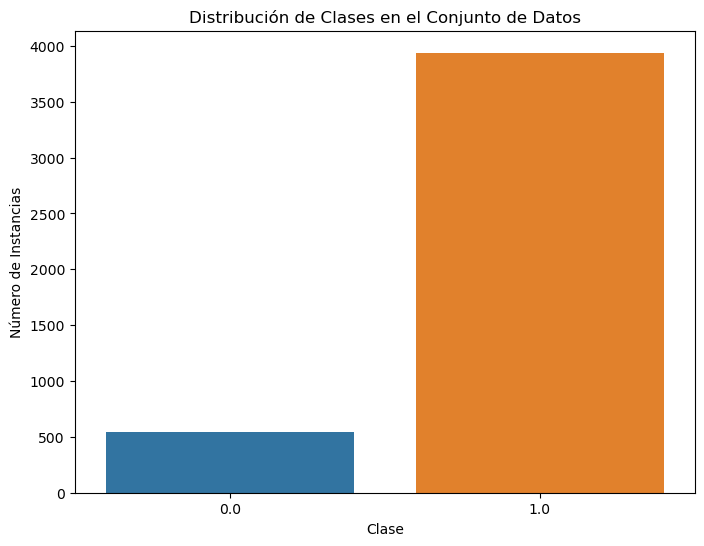

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de clases en el conjunto de datos
plt.figure(figsize=(8, 6))
sns.countplot(x='recaida', data=tumor_patients_recaida)
plt.title('Distribución de Clases en el Conjunto de Datos')
plt.xlabel('Clase')
plt.ylabel('Número de Instancias')
plt.show()

METODOS DE UNDERSAMPLING Y OVERSAMPLING

In [10]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from imblearn.combine import  SMOTETomek
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



#os =  RandomOverSampler(random_state=42)
#X_res, y_res = os.fit_resample(X_train, y_train)

#smote = SMOTETomek(random_state=42)
#X_res, y_res = smote.fit_resample(X_train, y_train)

#us = NearMiss()
#X_res, y_res = us.fit_resample(X_train, y_train)

sampling =RandomUnderSampler()
X_res, y_res = sampling.fit_resample(X_train, y_train)

# Inicializar y entrenar el modelo de árbol de decisiones

modelo_arbol = DecisionTreeClassifier(random_state=42, class_weight='balanced')
modelo_arbol.fit(X_res, y_res)


# Predecir con el conjunto de validación
y_pred = modelo_arbol.predict(X_test)

# Crear y mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)

# Imprimir el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("Informe de Clasificación Logistic regression:")
print(informe_clasificacion)

matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)


Matriz de Confusión:
[[ 22  24]
 [210 192]]
Informe de Clasificación Logistic regression:
              precision    recall  f1-score   support

         0.0       0.09      0.48      0.16        46
         1.0       0.89      0.48      0.62       402

    accuracy                           0.48       448
   macro avg       0.49      0.48      0.39       448
weighted avg       0.81      0.48      0.57       448

Matriz de Confusión:
[[ 22  24]
 [210 192]]


In [11]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report



# Dividir el dataset en conjunto de entrenamiento, test y validación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#os =  RandomOverSampler(random_state=42)
#X_res, y_res = os.fit_resample(X_train, y_train)

#smote = SMOTETomek(random_state=42)
#X_res, y_res = smote.fit_resample(X_train, y_train)

#us = NearMiss()
#X_res, y_res = us.fit_resample(X_train, y_train)

sampling =SMOTETomek(random_state=42)
X_res, y_res = sampling.fit_resample(X_train, y_train)

modelo_naive_bayes = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg", class_weight="balanced")
modelo_naive_bayes.fit(X_res, y_res)

# Evaluar el modelo en el conjunto de validación
y_pred = modelo_naive_bayes.predict(X_test)


# Imprimir el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("Informe de Clasificación Logistic regression:")
print(informe_clasificacion)


matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)

Informe de Clasificación Logistic regression:
              precision    recall  f1-score   support

         0.0       0.10      0.37      0.16        46
         1.0       0.90      0.63      0.74       402

    accuracy                           0.60       448
   macro avg       0.50      0.50      0.45       448
weighted avg       0.82      0.60      0.68       448

Matriz de Confusión:
[[ 17  29]
 [148 254]]


In [12]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



# Dividir el dataset en conjunto de entrenamiento, test y validación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#os =  RandomOverSampler(random_state=42)
#X_res, y_res = os.fit_resample(X_train, y_train)

#smote = SMOTETomek(random_state=42)
#X_res, y_res = smote.fit_resample(X_train, y_train)

#us = NearMiss()
#X_res, y_res = us.fit_resample(X_train, y_train)

sampling =  SMOTETomek(random_state=42)
X_res, y_res = sampling.fit_resample(X_train, y_train)

rf_classifier = RandomForestClassifier()

# Definir la cuadrícula de hiperparámetros a buscar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='recall')

# Realizar la búsqueda en la cuadrícula en los datos de entrenamiento
grid_search.fit(X_res, y_res)

best_rf_model = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de validación
y_pred = best_rf_model.predict(X_test)


# Imprimir el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("Informe de Clasificación LRandomForestClassifier:")
print(informe_clasificacion)


matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)

Informe de Clasificación LRandomForestClassifier:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        46
         1.0       0.90      1.00      0.95       402

    accuracy                           0.90       448
   macro avg       0.45      0.50      0.47       448
weighted avg       0.81      0.90      0.85       448

Matriz de Confusión:
[[  0  46]
 [  0 402]]


c:\Users\nicov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nicov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nicov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn.ensemble import GradientBoostingClassifier



# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier




# Dividir el dataset en conjunto de entrenamiento, test y validación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#os =  RandomOverSampler(random_state=42)
#X_res, y_res = os.fit_resample(X_train, y_train)

#smote = SMOTETomek(random_state=42)
#X_res, y_res = smote.fit_resample(X_train, y_train)

#us = NearMiss()
#X_res, y_res = us.fit_resample(X_train, y_train)

sampling =  NearMiss()
X_res, y_res = sampling.fit_resample(X_train, y_train)

gb_classifier = GradientBoostingClassifier()

# Definir la cuadrícula de hiperparámetros a buscar
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [ 4, 5],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 3]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=3, scoring='recall')




# Realizar la búsqueda en la cuadrícula en los datos de entrenamiento
grid_search.fit(X_res, y_res )

best_df_model = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de validación
y_pred = best_df_model.predict(X_test)


# Imprimir el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("Informe de Clasificación radientBoostingClassifier:")
print(informe_clasificacion)


matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)



Informe de Clasificación radientBoostingClassifier:
              precision    recall  f1-score   support

         0.0       0.09      0.41      0.15        46
         1.0       0.89      0.53      0.66       402

    accuracy                           0.52       448
   macro avg       0.49      0.47      0.41       448
weighted avg       0.81      0.52      0.61       448

Matriz de Confusión:
[[ 19  27]
 [189 213]]


In [14]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from imblearn.combine import  SMOTETomek
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from imblearn.under_sampling import NearMiss

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



#os =  RandomOverSampler(random_state=42)
#X_res, y_res = os.fit_resample(X_train, y_train)

#smote = SMOTETomek(random_state=42)
#X_res, y_res = smote.fit_resample(X_train, y_train)

#us = NearMiss()
#X_res, y_res = us.fit_resample(X_train, y_train)

sampling =NearMiss()
X_res, y_res = sampling.fit_resample(X_train, y_train)

# Inicializar y entrenar el modelo de árbol de decisiones
class_weights = {0: 2, 1: 1}
modelo_arbol = DecisionTreeClassifier(random_state=42, class_weight=class_weights)
modelo_arbol.fit(X_res, y_res)


# Predecir con el conjunto de validación
y_pred = modelo_arbol.predict(X_test)


# Imprimir el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("Informe de Clasificación Logistic regression:")
print(informe_clasificacion)

matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)


Informe de Clasificación Logistic regression:
              precision    recall  f1-score   support

         0.0       0.10      0.48      0.17        46
         1.0       0.89      0.51      0.65       402

    accuracy                           0.50       448
   macro avg       0.50      0.49      0.41       448
weighted avg       0.81      0.50      0.60       448

Matriz de Confusión:
[[ 22  24]
 [198 204]]


In [15]:
y_pred = modelo_arbol.predict(X_val)

informe_clasificacion = classification_report(y_val, y_pred)
print("Informe de Clasificación DecisionTreeClassifier :")
print(informe_clasificacion)

matriz_confusion = confusion_matrix(y_val, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

Informe de Clasificación DecisionTreeClassifier :
              precision    recall  f1-score   support

         0.0       0.16      0.56      0.25        64
         1.0       0.88      0.51      0.65       385

    accuracy                           0.52       449
   macro avg       0.52      0.54      0.45       449
weighted avg       0.77      0.52      0.59       449

Matriz de Confusión:
[[ 36  28]
 [188 197]]
Accuracy: 0.5189309576837416
